<a href="https://colab.research.google.com/github/Laura-Neff/ClusteringUsingUnlabelledData/blob/main/ClusteringUsingUnlabelledData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans

In [ ]:
data = pd.read_csv('Mall_Customers.csv', index_col=0)

data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [ ]:
data.drop('Gender', axis=1, inplace=True)
data.drop('Age', axis=1, inplace=True)

data.head()

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


In [ ]:
data = data.sample(frac=1) #all original data points are preserved

In [ ]:
k_means = KMeans(n_clusters=2)
k_means.fit(data)

KMeans(n_clusters=2)

In [ ]:
k_means.labels_ #will show what cluster each data point belongs to

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0], dtype=int32)

In [ ]:
np.unique(k_means.labels_) #indexes of clusters

array([0, 1], dtype=int32)

In [ ]:
centers = k_means.cluster_centers_

centers #shows centroids

array([[37.28888889, 50.28888889],
       [79.6       , 50.12727273]])

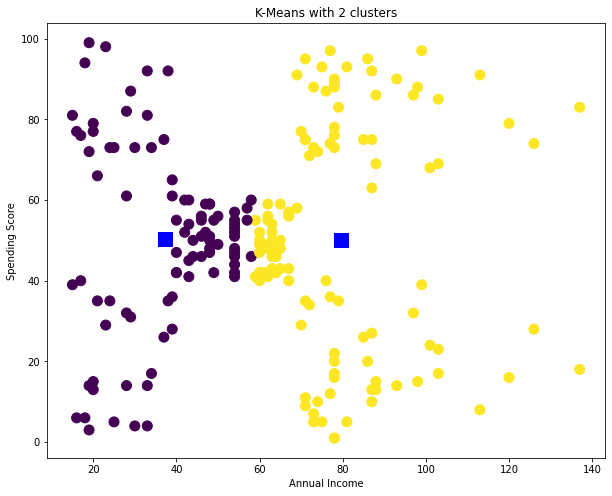

In [ ]:
plt.figure(figsize=(10, 8))

plt.scatter(data['Annual Income (k$)'], 
            data['Spending Score (1-100)'], 
            c=k_means.labels_, s=100)

plt.scatter(centers[:,0], centers[:,1], color='blue', marker='s', s=200) 

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means with 2 clusters')

plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score (data, k_means.labels_)

print("Score = ", score)

#how you assess how well the clustering algorithm performed
#a measure of how similar a point is to other points in its own cluster and how different it is from points in other clusters
#changes based on how many clusters

Score =  0.29689691625030085


In [ ]:
k_means = KMeans(n_clusters=5)
k_means.fit(data)

KMeans(n_clusters=5)

In [ ]:
# from sklearn.cluster import KMeans
# sum_of_squared_distances = []

# K = range(1,15)

# for k in K:
#     k_means = KMeans(n_clusters=k)
#     k_means = k_means.fit(data)

#     sum_of_squared_distances.append(k_means.inertia_)

# plt.plot(K, sum_of_squared_distances, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Sum of squared distances')

# plt.title('Elbow plot for optimal number of clusters')
# plt.show()

In [ ]:
np.unique(k_means.labels_)

array([0, 1, 2, 3, 4], dtype=int32)

In [ ]:
centers = k_means.cluster_centers_

centers

array([[26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636]])

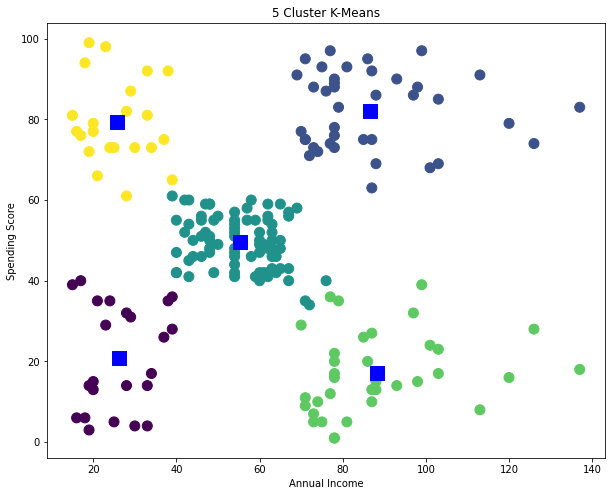

In [ ]:
plt.figure(figsize=(10, 8))

plt.scatter(data['Annual Income (k$)'], 
            data['Spending Score (1-100)'], 
            c=k_means.labels_, s=100)

plt.scatter(centers[:,0], centers[:,1], color='blue', marker='s', s=200) 

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('5 Cluster K-Means')

plt.show()

In [ ]:
score = silhouette_score(data, k_means.labels_)

print("Score = ", score)

Score =  0.553931997444648
